<a href="https://colab.research.google.com/github/RXX17/CoIuKTLM/blob/main/OsteoEfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [15]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input

In [17]:
# Image size and loading datasets
IMAGE_SIZE = [600, 600, 3]

In [18]:
efficientnet = EfficientNetB7(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

In [19]:
# don't train existing weights
for layer in efficientnet.layers:
    layer.trainable = False

In [20]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Split/train/*')

In [21]:
# our layers - you can add more if you want
x = Flatten()(efficientnet.output)

In [22]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=efficientnet.input, outputs=prediction)

In [23]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 600, 600, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 600, 600, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

In [24]:
import tensorflow as tf

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]

In [25]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=METRICS
)

In [26]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Split/train',
                                                 target_size = (600, 600),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 913 images belonging to 4 classes.


In [28]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Split/val',
                                            target_size = (600, 600),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 231 images belonging to 4 classes.


In [29]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-29-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
29/29 [==============================] - 374s 12s/step - loss: 208.9541 - accuracy: 0.6610 - precision: 0.3220 - recall: 0.3220 - auc: 0.5485 - val_loss: 77.9014 - val_accuracy: 0.7338 - val_precision: 0.4675 - val_recall: 0.4675 - val_auc: 0.6450
Epoch 2/50
29/29 [==============================] - 125s 4s/step - loss: 84.6730 - accuracy: 0.6802 - precision: 0.3604 - recall: 0.3604 - auc: 0.5782 - val_loss: 62.4801 - val_accuracy: 0.7338 - val_precision: 0.4675 - val_recall: 0.4675 - val_auc: 0.6450
Epoch 3/50
29/29 [==============================] - 126s 4s/step - loss: 75.5551 - accuracy: 0.6706 - precision: 0.3410 - recall: 0.3406 - auc: 0.5611 - val_loss: 65.3408 - val_accuracy: 0.6147 - val_precision: 0.2294 - val_recall: 0.2294 - val_auc: 0.4863
Epoch 4/50
29/29 [==============================] - 126s 4s/step - loss: 44.4800 - accuracy: 0.6818 - precision: 0.3636 - recall: 0.3636 - auc: 0.5815 - val_loss: 44.2994 - val_accuracy: 0.7338 - val_precision: 0.4675 - val_rec

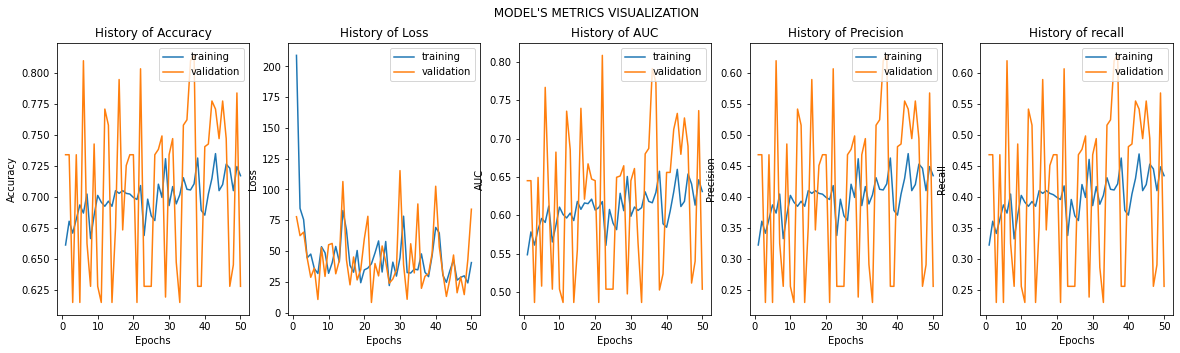

In [30]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,recall, val_recall):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])

    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])

    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(recall) + 1), recall)
    ax5.plot(range(1, len(val_recall) + 1), val_recall)
    ax5.set_title('History of recall')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('Recall')
    ax5.legend(['training', 'validation'])

plt.show()
    

Train_Val_Plot(r.history['accuracy'],r.history['val_accuracy'],
               r.history['loss'],r.history['val_loss'],
               r.history['auc'],r.history['val_auc'],
               r.history['precision'],r.history['val_precision'],
               r.history['recall'],r.history['val_recall']
              )